In [1]:
import numpy as np
import pandas as pd

#dataset import
dataset = pd.read_csv("train.csv") 
dataset.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2


In [2]:
#Changing pandas dataframe to numpy array
X = dataset.iloc[:,:20].values
y = dataset.iloc[:,20:21].values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [3]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
y

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Neural network
model = Sequential()
model.add(Dense(16, input_dim=20, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(4, activation="softmax"))

Using TensorFlow backend.


In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Train on 1800 samples, validate on 200 samples
Epoch 1/100
1800/1800 [==============================] - 1s 430us/step - loss: 1.5614 - accuracy: 0.2661 - val_loss: 1.4881 - val_accuracy: 0.2600
Epoch 2/100
1800/1800 [==============================] - 0s 48us/step - loss: 1.4215 - accuracy: 0.2850 - val_loss: 1.4041 - val_accuracy: 0.2500
Epoch 3/100
1800/1800 [==============================] - 0s 78us/step - loss: 1.3611 - accuracy: 0.3106 - val_loss: 1.3608 - val_accuracy: 0.2800
Epoch 4/100
1800/1800 [==============================] - 0s 66us/step - loss: 1.3172 - accuracy: 0.3539 - val_loss: 1.3230 - val_accuracy: 0.3350
Epoch 5/100
1800/1800 [==============================] - 0s 65us/step - loss: 1.2719 - accuracy: 0.4078 - val_loss: 1.2747 - val_accuracy: 0.3900
Epoch 6/100
1800/1800 [==============================] - 0s 59us/step - loss: 1.2168 - accuracy: 0.4706 - val_loss: 1.2181 - val_accuracy: 0.4400
Epoch 7/100
1800/1800 [==============================] - 0s 57us/step - loss

1800/1800 [==============================] - 0s 80us/step - loss: 0.0924 - accuracy: 0.9794 - val_loss: 0.1689 - val_accuracy: 0.9400
Epoch 57/100
1800/1800 [==============================] - 0s 74us/step - loss: 0.0895 - accuracy: 0.9822 - val_loss: 0.1576 - val_accuracy: 0.9350
Epoch 58/100
1800/1800 [==============================] - 0s 68us/step - loss: 0.0874 - accuracy: 0.9794 - val_loss: 0.1734 - val_accuracy: 0.9350
Epoch 59/100
1800/1800 [==============================] - 0s 72us/step - loss: 0.0853 - accuracy: 0.9833 - val_loss: 0.1600 - val_accuracy: 0.9300
Epoch 60/100
1800/1800 [==============================] - 0s 87us/step - loss: 0.0834 - accuracy: 0.9817 - val_loss: 0.1617 - val_accuracy: 0.9300
Epoch 61/100
1800/1800 [==============================] - 0s 71us/step - loss: 0.0808 - accuracy: 0.9839 - val_loss: 0.1556 - val_accuracy: 0.9300
Epoch 62/100
1800/1800 [==============================] - 0s 50us/step - loss: 0.0803 - accuracy: 0.9822 - val_loss: 0.1681 - val_a

In [11]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [12]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print("Accuracy is:", a*100)

Accuracy is: 93.0


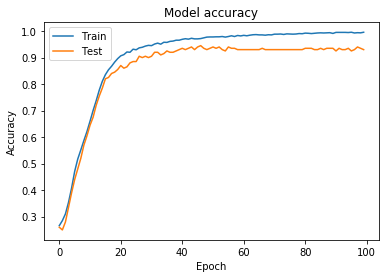

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()